In [1]:
import cPickle
from tools import *
d = load_data()
plt.ion()

In [2]:
# Create a clean data file
d_clean = {}

# P07

- removed t14: lag. Trial name is Roman_Occlusion_NoCue_LeftToRight0001  
- removed t28: lag. Trial name is Roman_Visible_Cue_LeftToRight0004
- removed t44: drop in data. Trial name: Roman_Visible_NoCue_RightToLeft0001
- edited t13: startmovement. Tiral name: Roman_Occlusion_NoCue_LeftToRight0000

In [3]:
d_clean['P07'] = d['P07']

del d_clean['P07']['trials']['t14']
del d_clean['P07']['trials']['t28']
del d_clean['P07']['trials']['t44']

curve = np.array(d_clean['P07']['trials']['t13']['startmovement'])
curve[400:600] = 0
d_clean['P07']['trials']['t13']['startmovement'] = tuple(curve)

# P08

- removed t26: index & thumb deop at the end + lag. Trial name: Roman_Visible_Cue_LeftToRight0001  
- removed t30: lag. Trial name: 'Roman_Visible_Cue_LeftToRight0007'  
- removed t36: lag. Trial name: 'Roman_Visible_Cue_RightToLeft0006'  
- edited t22: noise in startmovement. Tiral name:

In [4]:
d_clean['P08'] = d['P08']

del d_clean['P08']['trials']['t26']
del d_clean['P08']['trials']['t30']
del d_clean['P08']['trials']['t36']

curve = np.array(d_clean['P08']['trials']['t22']['startmovement'])
curve[650:910] = 0
d_clean['P08']['trials']['t22']['startmovement'] = tuple(curve)

# P09

- removed t13: earlier reach. Trial name: Roman_Occlusion_NoCue_LeftToRight0000

In [5]:
d_clean['P09'] = d['P09']

del d_clean['P09']['trials']['t13']

# P 11

- removed t1: early reach. Name: Roman_Occlusion_Cue_RightToLeft0003  
- removed t13: early reach. Name: Roman_Occlusion_NoCue_LeftToRight0000  
- removed t10: too early reach. Name: Roman_Occlusion_Cue_LeftToRight0000  
- removed t17: drop data. Name: Roman_Occlusion_NoCue_LeftToRight0004

In [6]:
d_clean['P11'] = d['P11']

del d_clean['P11']['trials']['t10']
del d_clean['P11']['trials']['t13']
del d_clean['P11']['trials']['t1']
del d_clean['P11']['trials']['t17']

# curve = np.array(d_clean['P11']['trials']['t17']['startmovement'])
# curve[0:300] = 0
# d_clean['P11']['trials']['t17']['startmovement'] = tuple(curve)

# P 12

- removed t31: no data at the end of trial + lag. Name: Roman_Visible_Cue_RightToLeft0000  
- removed t22: lag. Name: Roman_Occlusion_NoCue_RightToLeft0004  
- removed t12: looks like a lag, data missing. Name: Roman_Occlusion_Cue_RightToLeft0005


In [7]:
d_clean['P12'] = d['P12']

del d_clean['P12']['trials']['t31']
del d_clean['P12']['trials']['t22']
del d_clean['P12']['trials']['t12']

# P 16

- removed t1: no reach. Name: Roman_Occlusion_Cue_LeftToRight0000  
- removed t16: looks like a lag, no data. Name: Roman_Occlusion_NoCue_LeftToRight0003  
- removed t26: early reach. Name: Roman_Visible_Cue_LeftToRight0001  
- removed t41: no data at the beginning. Name: Roman_Visible_NoCue_LeftToRight0004  
- removed t46: no data. Name: Roman_Visible_NoCue_RightToLeft0003  
- removed t48: lag. Name: Roman_Visible_NoCue_RightToLeft0005
- recalculated startmovement with wrist12vel
- edited t22: startmovement. Name: Roman_Occlusion_NoCue_RightToLeft0004
- edited t47: startmovement. Name: Roman_Visible_NoCue_RightToLeft0004

In [8]:
d_clean['P16'] = d['P16']

del d_clean['P16']['trials']['t1']
del d_clean['P16']['trials']['t16']
del d_clean['P16']['trials']['t26']
del d_clean['P16']['trials']['t41']
del d_clean['P16']['trials']['t46']
del d_clean['P16']['trials']['t48']

for trial in d_clean['P16']['trials'].values():
    x = []
    for point in trial['wrist12vel']:
        if point > 0.05:
            x.append(1)
        else:
            x.append(0)
    trial['startmovement']= tuple(x)

curve = np.array(d_clean['P16']['trials']['t22']['startmovement'])
curve[200:400] = 0
d_clean['P16']['trials']['t22']['startmovement'] = tuple(curve)

curve = np.array(d_clean['P16']['trials']['t47']['startmovement'])
curve[200:400] = 0
d_clean['P16']['trials']['t47']['startmovement'] = tuple(curve)

# P 18

- removed t12: drop in the data. Name: Roman_Occlusion_Cue_RightToLeft0005  
- removed t15: drop. Name: Roman_Occlusion_NoCue_LeftToRight0002  
- removed t19: drop. Name: Roman_Occlusion_NoCue_RightToLeft0000
- removed t47: strange data at grasp. too rapid. Name: Roman_Visible_NoCue_RightToLeft0004

In [9]:
d_clean['P18'] = d['P18']

del d_clean['P18']['trials']['t12']
del d_clean['P18']['trials']['t15']
del d_clean['P18']['trials']['t19']
del d_clean['P18']['trials']['t47']

# P19

- removed t3: drops. Name: Roman_Occlusion_Cue_LeftToRight0002  
- removed t5: drop. Name: Roman_Occlusion_Cue_LeftToRight0004  
- removed t7: drop. Name: Roman_Occlusion_Cue_RightToLeft0000  
- removed t12: drop. Name: Roman_Occlusion_Cue_RightToLeft0005  
- removed t34: drop. Name: Roman_Visible_Cue_RightToLeft0003


In [10]:
d_clean['P19'] = d['P19']

del d_clean['P19']['trials']['t3']
del d_clean['P19']['trials']['t5']
del d_clean['P19']['trials']['t7']
del d_clean['P19']['trials']['t12']
del d_clean['P19']['trials']['t34']

Roman_Visible_Cue_RightToLeft0005


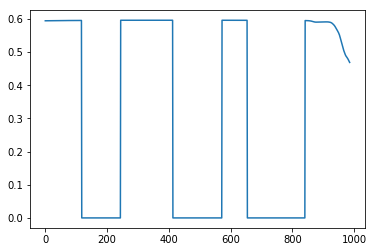

In [11]:
trial = d['P20']['trials']['t35']

print trial['name']

plt.plot(trial['index8x'])
plt.show()


In [12]:
manual_save_data(d_clean, 'clean_data.pkl')

The data will be overwritten. Continue? Yes/noYes
